In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
    

### Function definition

In [23]:
def function(x):
    y1 = x[0]**3 - x[1]
    y2 = y1**2
    z1 = x[1] - x[0]
    z2 = 2 * (z1**4)
    return y2 + z2 

### Stopping Criteria

In [24]:
def norm(x):
    return np.sqrt((x[0]**2)+(x[1]**2))

def x_criteria(x1:list, x2:list):
    diff = [x1[i]-x2[i] for i in range(len(x1))]
        
    if (norm(diff) <= 0.01):
        return True
    else:
        return False
    
def fx_criteria(f1,f2):
    high = max(f1,f2)
    low = min(f1,f2)
    diff = high-low
    if (diff/f1 <= 0.001):
        return True
    else:
        return False

In [25]:
# Optimization algorithms
def cyclic_coordinate(x_init:list,max_iter=100, termination_criteria='x'):
    d = [np.array([1, 0]), np.array([0, 1])]
    x = [x_init.copy()]
    f = []
    p = symbols("p")
    
    for i in range(max_iter):
        f.append(function(x[-1].copy()))
        y = [x[-1].copy()]
        for j in range(2):
            z = y[j] + d[j]*p
            roots = solve(function(z), p, domain="RR")
            real_parts = [float(root.as_real_imag()[0]) for root in roots]
            y.append(y[j] + d[j]*float(real_parts[0]))

        x.append(y[-1].copy())

        if termination_criteria == 'x':
            if x_criteria(x[-1],x[-2]):
                break
        elif termination_criteria == 'fx':
            if fx_criteria(function(x[-1]),function(x[-2])):
                break



    return x,f


### Steepest Descent

In [26]:
def gradient(x1, x2):
    df_dx1 = 2 * (x1**3 - x2) * (3 * x1**2) - 8 * (x2 - x1)**3
    df_dx2 = -2 * (x1**3 - x2) + 8 * (x2 - x1)**3
    return np.array([df_dx1, df_dx2])

In [27]:
def steepest_descent(x_init, max_iter=1000, alpha=0.01, termination_criteria='x'):
    x = [np.array(x_init.copy())]
    f = []

    for i in range(max_iter):
        y = x[-1].copy()
        f.append(function(y))
        grad = gradient(y[0], y[1])
        x.append(y - alpha * grad)

        if termination_criteria == 'x':
            if x_criteria(x[-1],x[-2]):
                break
        elif termination_criteria == 'fx':
            if fx_criteria(function(x[-1]),function(x[-2])):
                break
    return x,f

### Newton's method

In [28]:
def hessian(x1, x2):
    d2f_dx1dx1 = 6 * x1 * (2 * x1**3 - 2 * x2) - 24 * (x2 - x1)**2
    d2f_dx1dx2 = -6 * x1**2 + 24 * (x2 - x1)**2
    d2f_dx2dx2 = 2 + 24 * (x2 - x1)**2
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

In [29]:
def newtons(x_init, max_iter=1000, termination_criteria='x', alpha=0.1):
    x = [np.array(x_init.copy())]
    f = []

    for i in range(max_iter):
        y = x[-1].copy()
        f.append(function(y))
        grad = gradient(y[0],y[1])
        hess = hessian(y[0],y[1])
        hess_inv = np.linalg.inv(hess)
        change = np.linalg.matmul(hess_inv,-grad)
        x.append(y + change*alpha)

        if termination_criteria == 'x':
            if x_criteria(x[-1],x[-2]):
                break
        elif termination_criteria == 'fx':
            if fx_criteria(function(x[-1]),function(x[-2])):
                break
    return x,f

### Initial point (1,2)

In [30]:
cyclic_cordinate_fx_criteria_coord, cyclic_cordinate_fx_criteria_func = cyclic_coordinate([1,2], termination_criteria='fx')
cyclic_cordinate_x_criteria_coord,cyclic_cordinate_x_criteria_func = cyclic_coordinate([1,2], termination_criteria='x')

steepest_descent_fx_criteria_coord, steepest_descent_fx_criteria_func = steepest_descent([1,2], termination_criteria='fx')
steepest_descent_x_criteria_coord, steepest_descent_x_criteria_func = steepest_descent([1,2], termination_criteria='x')

newtons_fx_criteria_coord, newtons_fx_criteria_func = newtons([1,2], termination_criteria='fx')
newtons_x_criteria_coord, newtons_x_criteria_func = newtons([1,2], termination_criteria='x')

### Results


In [31]:
print(f"The optimal value of x using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_coord[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_coord[-1]},\nand the optimal value of function using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_func[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_coord[-1]} and Fx criteria is {steepest_descent_fx_criteria_coord[-1]}, \nand the optimal value of function using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_func[-1]} and Fx criteria is {steepest_descent_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the newton's algorithm with X criteria is {newtons_x_criteria_coord[-1]} and Fx criteria is {newtons_fx_criteria_coord[-1]}, \nand the optimal value of function using the newton's algorithm with X criteria is {newtons_x_criteria_func[-1]} and Fx criteria is {newtons_fx_criteria_func[-1]}\n")

The optimal value of x using the cyclic coordinate algorithm with X criteria is [-1.005971   -1.01801318] and Fx criteria is [-1.00585599 -1.01766447],
and the optimal value of function using the cyclic coordinate algorithm with X criteria is 4.215075405080659e-08 and Fx criteria is 3.896934891690328e-08

The optimal value of x using the steepest descent algorithm with X criteria is [1.2482608  1.78494299] and Fx criteria is [1.05406099 1.16892735], 
and the optimal value of function using the steepest descent algorithm with X criteria is 0.20117336573116867 and Fx criteria is 0.00035359882798111704

The optimal value of x using the newton's algorithm with X criteria is [-0.44339498 -0.2354817 ] and Fx criteria is [-0.41169638 -0.15618936], 
and the optimal value of function using the newton's algorithm with X criteria is 0.02704525525550327 and Fx criteria is 0.01599669087110811



### Plotting

In [32]:
cyclic_cordinate_fx_criteria_coord = np.array(cyclic_cordinate_fx_criteria_coord)
cyclic_cordinate_x_criteria_coord = np.array(cyclic_cordinate_x_criteria_coord)

steepest_descent_fx_criteria_coord = np.array(steepest_descent_fx_criteria_coord)
steepest_descent_x_criteria_coord = np.array(steepest_descent_x_criteria_coord)

newtons_fx_criteria_coord = np.array(newtons_fx_criteria_coord)
newtons_x_criteria_coord = np.array(newtons_x_criteria_coord)

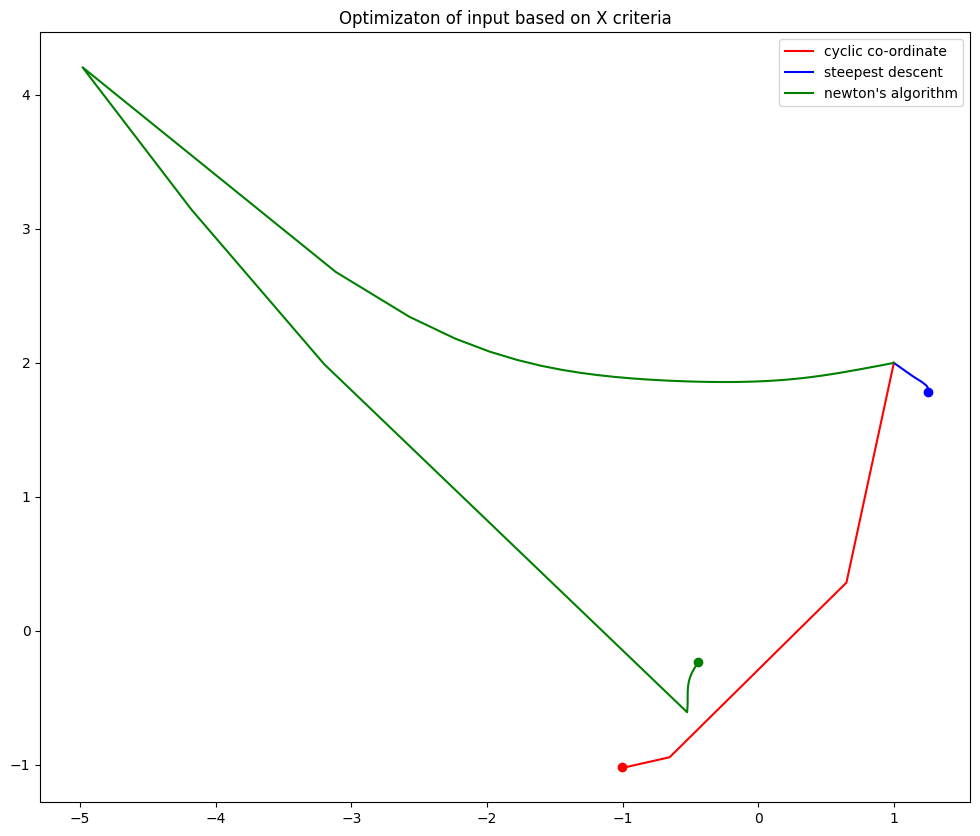

In [33]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_x_criteria_coord[:,0], cyclic_cordinate_x_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_x_criteria_coord[-1:,0], cyclic_cordinate_x_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_x_criteria_coord[:,0], steepest_descent_x_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_x_criteria_coord[-1:,0], steepest_descent_x_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_x_criteria_coord[:,0], newtons_x_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_x_criteria_coord[-1:,0], newtons_x_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on X criteria")
plt.legend()
plt.show()

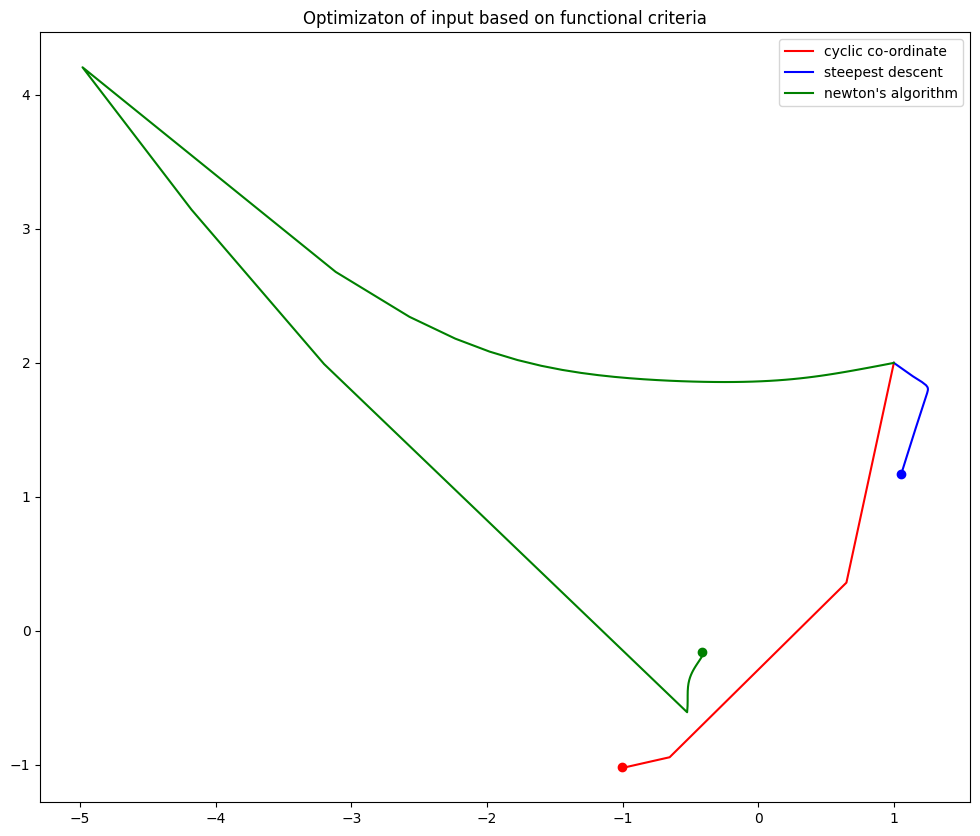

In [34]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_fx_criteria_coord[:,0], cyclic_cordinate_fx_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_fx_criteria_coord[-1:,0], cyclic_cordinate_fx_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_fx_criteria_coord[:,0], steepest_descent_fx_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_fx_criteria_coord[-1:,0], steepest_descent_fx_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_fx_criteria_coord[:,0], newtons_fx_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_fx_criteria_coord[-1:,0], newtons_fx_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on functional criteria")
plt.legend()
plt.show()

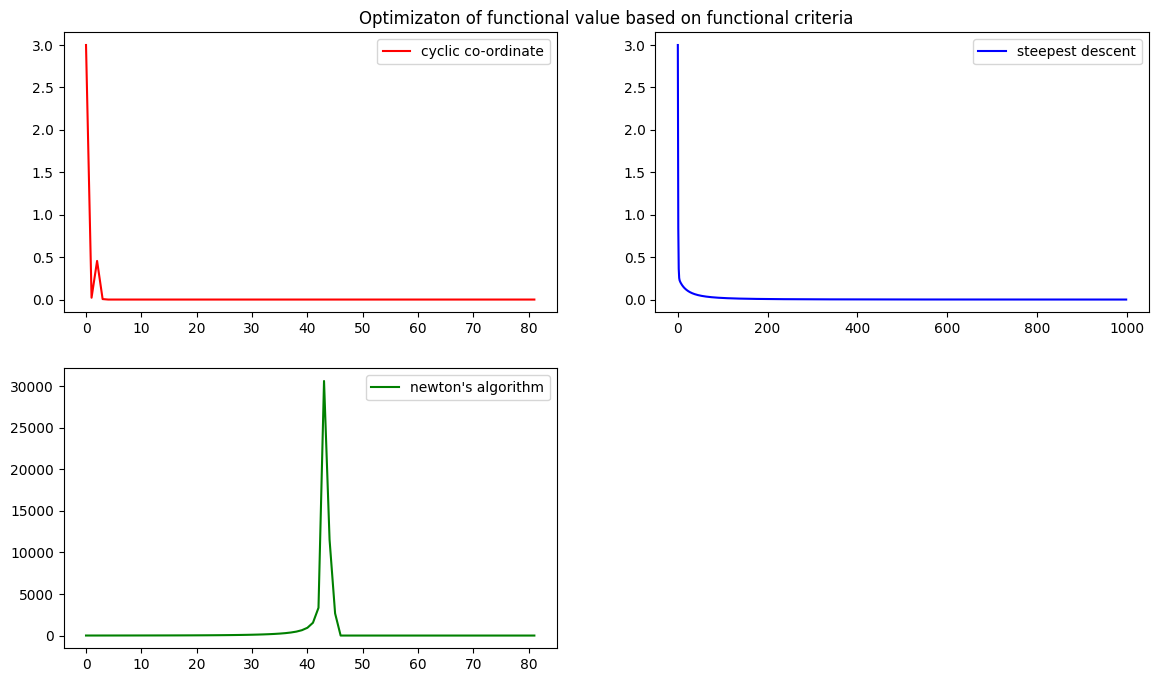

In [35]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on functional criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_fx_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_fx_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_fx_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

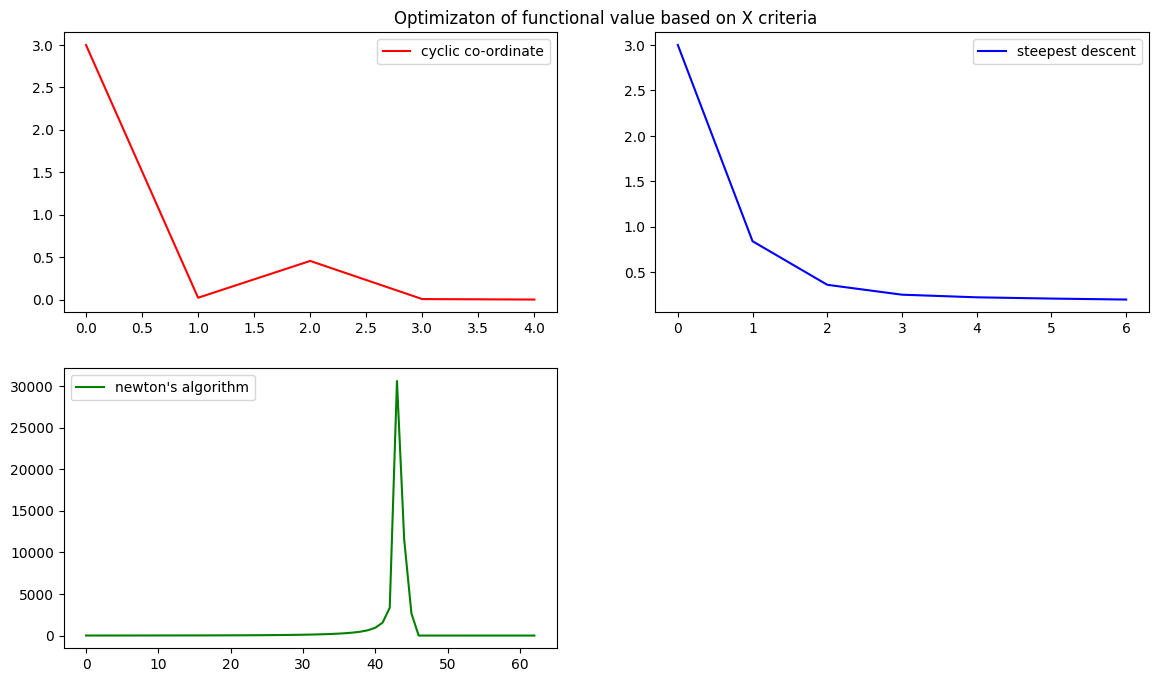

In [36]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on X criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_x_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_x_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_x_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

### Initial point (2,0)

In [37]:
cyclic_cordinate_fx_criteria_coord, cyclic_cordinate_fx_criteria_func = cyclic_coordinate([2,0], termination_criteria='fx')
cyclic_cordinate_x_criteria_coord,cyclic_cordinate_x_criteria_func = cyclic_coordinate([2,0], termination_criteria='x')

steepest_descent_fx_criteria_coord, steepest_descent_fx_criteria_func = steepest_descent([2,0], termination_criteria='fx')
steepest_descent_x_criteria_coord, steepest_descent_x_criteria_func = steepest_descent([2,0], termination_criteria='x')

newtons_fx_criteria_coord, newtons_fx_criteria_func = newtons([2,0], termination_criteria='fx')
newtons_x_criteria_coord, newtons_x_criteria_func = newtons([2,0], termination_criteria='x')

## print result
print(f"The optimal value of x using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_coord[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_coord[-1]},\nand the optimal value of function using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_func[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_coord[-1]} and Fx criteria is {steepest_descent_fx_criteria_coord[-1]}, \nand the optimal value of function using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_func[-1]} and Fx criteria is {steepest_descent_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the newton's algorithm with X criteria is {newtons_x_criteria_coord[-1]} and Fx criteria is {newtons_fx_criteria_coord[-1]}, \nand the optimal value of function using the newton's algorithm with X criteria is {newtons_x_criteria_func[-1]} and Fx criteria is {newtons_fx_criteria_func[-1]}\n")

## to array
cyclic_cordinate_fx_criteria_coord = np.array(cyclic_cordinate_fx_criteria_coord)
cyclic_cordinate_x_criteria_coord = np.array(cyclic_cordinate_x_criteria_coord)

steepest_descent_fx_criteria_coord = np.array(steepest_descent_fx_criteria_coord)
steepest_descent_x_criteria_coord = np.array(steepest_descent_x_criteria_coord)

newtons_fx_criteria_coord = np.array(newtons_fx_criteria_coord)
newtons_x_criteria_coord = np.array(newtons_x_criteria_coord)


C:\Users\Swastik\AppData\Local\Temp\ipykernel_17472\2373384730.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  if (diff/f1 <= 0.001):
C:\Users\Swastik\AppData\Local\Temp\ipykernel_17472\2373384730.py:16: RuntimeWarning: invalid value encountered in scalar divide
  if (diff/f1 <= 0.001):


The optimal value of x using the cyclic coordinate algorithm with X criteria is [0. 0.] and Fx criteria is [0. 0.],
and the optimal value of function using the cyclic coordinate algorithm with X criteria is 0.0 and Fx criteria is 0.0

The optimal value of x using the steepest descent algorithm with X criteria is [-0.10190725  0.24939708] and Fx criteria is [-0.04835289 -0.00029494], 
and the optimal value of function using the steepest descent algorithm with X criteria is 0.1026895459257976 and Fx criteria is 1.0711974483223247e-05

The optimal value of x using the newton's algorithm with X criteria is [0.44091984 0.18099018] and Fx criteria is [0.44333649 0.17815843], 
and the optimal value of function using the newton's algorithm with X criteria is 0.01827917915414935 and Fx criteria is 0.018171059316413565



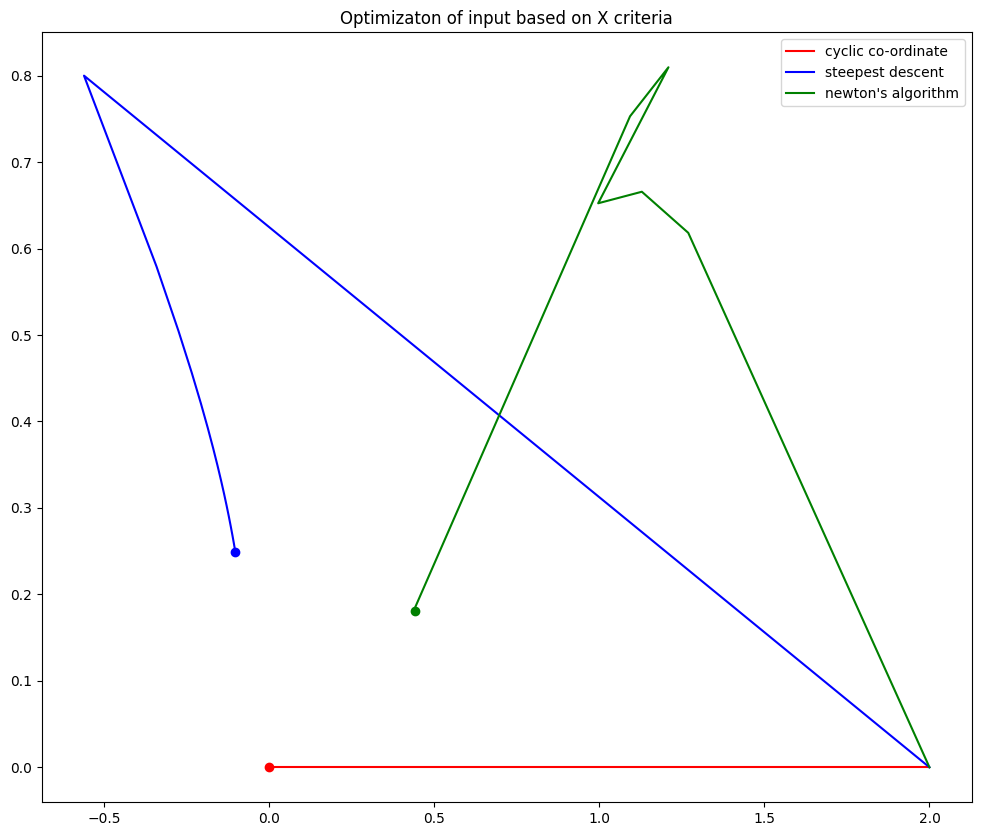

In [38]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_x_criteria_coord[:,0], cyclic_cordinate_x_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_x_criteria_coord[-1:,0], cyclic_cordinate_x_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_x_criteria_coord[:,0], steepest_descent_x_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_x_criteria_coord[-1:,0], steepest_descent_x_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_x_criteria_coord[:,0], newtons_x_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_x_criteria_coord[-1:,0], newtons_x_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on X criteria")
plt.legend()
plt.show()

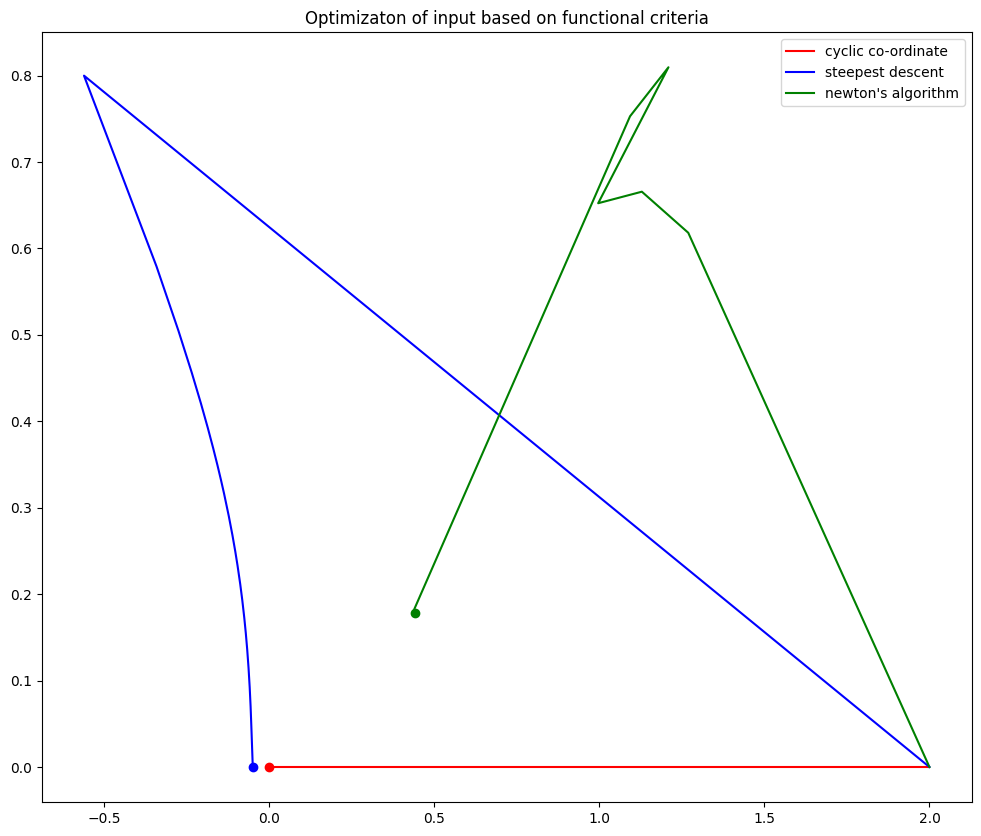

In [39]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_fx_criteria_coord[:,0], cyclic_cordinate_fx_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_fx_criteria_coord[-1:,0], cyclic_cordinate_fx_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_fx_criteria_coord[:,0], steepest_descent_fx_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_fx_criteria_coord[-1:,0], steepest_descent_fx_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_fx_criteria_coord[:,0], newtons_fx_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_fx_criteria_coord[-1:,0], newtons_fx_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on functional criteria")
plt.legend()
plt.show()

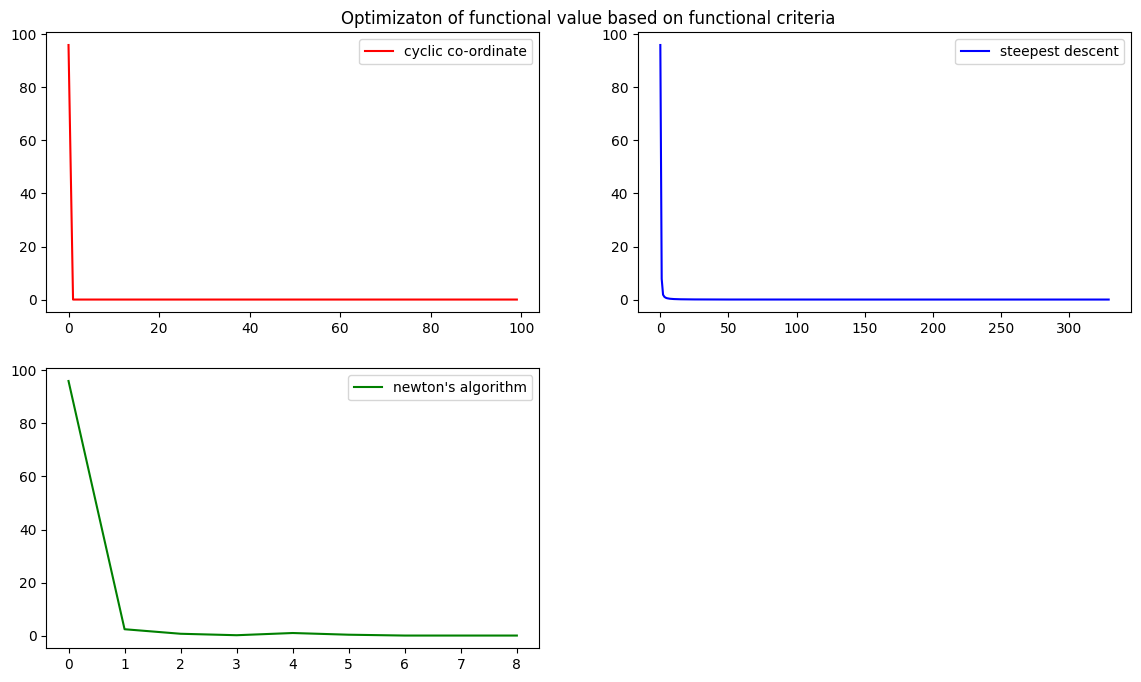

In [40]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on functional criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_fx_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_fx_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_fx_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

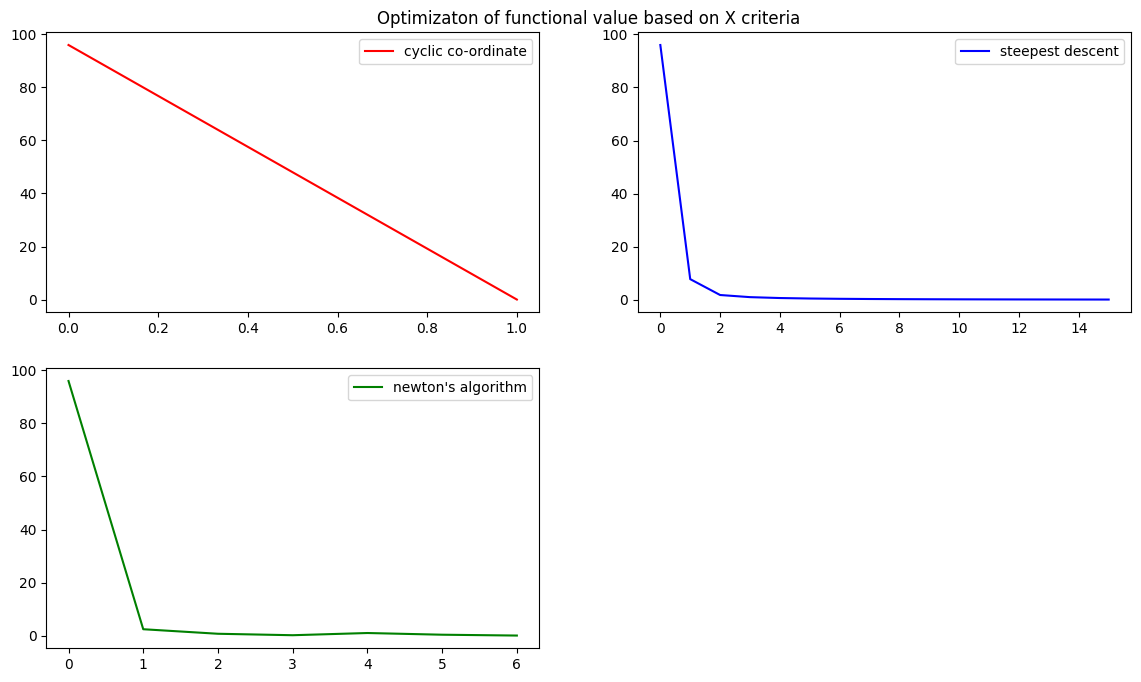

In [41]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on X criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_x_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_x_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_x_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

### Initial point 10,10

In [137]:
def steepest_descent_backtracked(x_init, max_iter=1000, alpha=0.01, termination_criteria='x'):
    x = [np.array(x_init.copy())]
    f = []

    for i in range(max_iter):
        y = x[-1].copy()
        f.append(function(y))
        grad = gradient(y[0], y[1])
        delta_x = alpha*grad
        if norm(y-delta_x) > 1:
            delta_x = 0.1
        x.append(y - delta_x)


        if termination_criteria == 'x':
            if x_criteria(x[-1],x[-2]):
                break
        elif termination_criteria == 'fx':
            if fx_criteria(function(x[-1]),function(x[-2])):
                break
    return x,f

In [138]:
steepest_descent_fx_criteria_coord, steepest_descent_fx_criteria_func = steepest_descent_backtracked([10,10], termination_criteria='fx')
steepest_descent_x_criteria_coord, steepest_descent_x_criteria_func = steepest_descent_backtracked([10,10], termination_criteria='x')

In [139]:
cyclic_cordinate_fx_criteria_coord, cyclic_cordinate_fx_criteria_func = cyclic_coordinate([10,10], termination_criteria='fx')
cyclic_cordinate_x_criteria_coord,cyclic_cordinate_x_criteria_func = cyclic_coordinate([10,10], termination_criteria='x')

steepest_descent_fx_criteria_coord, steepest_descent_fx_criteria_func = steepest_descent_backtracked([10,10], termination_criteria='fx')
steepest_descent_x_criteria_coord, steepest_descent_x_criteria_func = steepest_descent_backtracked([10,10], termination_criteria='x')

newtons_fx_criteria_coord, newtons_fx_criteria_func = newtons([10,10], termination_criteria='fx')
newtons_x_criteria_coord, newtons_x_criteria_func = newtons([10,10], termination_criteria='x')

## print result
print(f"The optimal value of x using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_coord[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_coord[-1]},\nand the optimal value of function using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_func[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_coord[-1]} and Fx criteria is {steepest_descent_fx_criteria_coord[-1]}, \nand the optimal value of function using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_func[-1]} and Fx criteria is {steepest_descent_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the newton's algorithm with X criteria is {newtons_x_criteria_coord[-1]} and Fx criteria is {newtons_fx_criteria_coord[-1]}, \nand the optimal value of function using the newton's algorithm with X criteria is {newtons_x_criteria_func[-1]} and Fx criteria is {newtons_fx_criteria_func[-1]}\n")

## to array
cyclic_cordinate_fx_criteria_coord = np.array(cyclic_cordinate_fx_criteria_coord)
cyclic_cordinate_x_criteria_coord = np.array(cyclic_cordinate_x_criteria_coord)

steepest_descent_fx_criteria_coord = np.array(steepest_descent_fx_criteria_coord)
steepest_descent_x_criteria_coord = np.array(steepest_descent_x_criteria_coord)

newtons_fx_criteria_coord = np.array(newtons_fx_criteria_coord)
newtons_x_criteria_coord = np.array(newtons_x_criteria_coord)


The optimal value of x using the cyclic coordinate algorithm with X criteria is [-1.03437585 -1.10530028] and Fx criteria is [-1.02904151 -1.08883035],
and the optimal value of function using the cyclic coordinate algorithm with X criteria is 5.454042040224139e-05 and Fx criteria is 2.696410373753656e-05

The optimal value of x using the steepest descent algorithm with X criteria is [0.75711182 0.49969003] and Fx criteria is [0.79056675 0.53686696], 
and the optimal value of function using the steepest descent algorithm with X criteria is 0.013187986761897875 and Fx criteria is 0.010143498184869326

The optimal value of x using the newton's algorithm with X criteria is [0.99060576 0.96363534] and Fx criteria is [0.9905869  0.97203424], 
and the optimal value of function using the newton's algorithm with X criteria is 8.927576934119289e-05 and Fx criteria is 2.370327430777459e-07



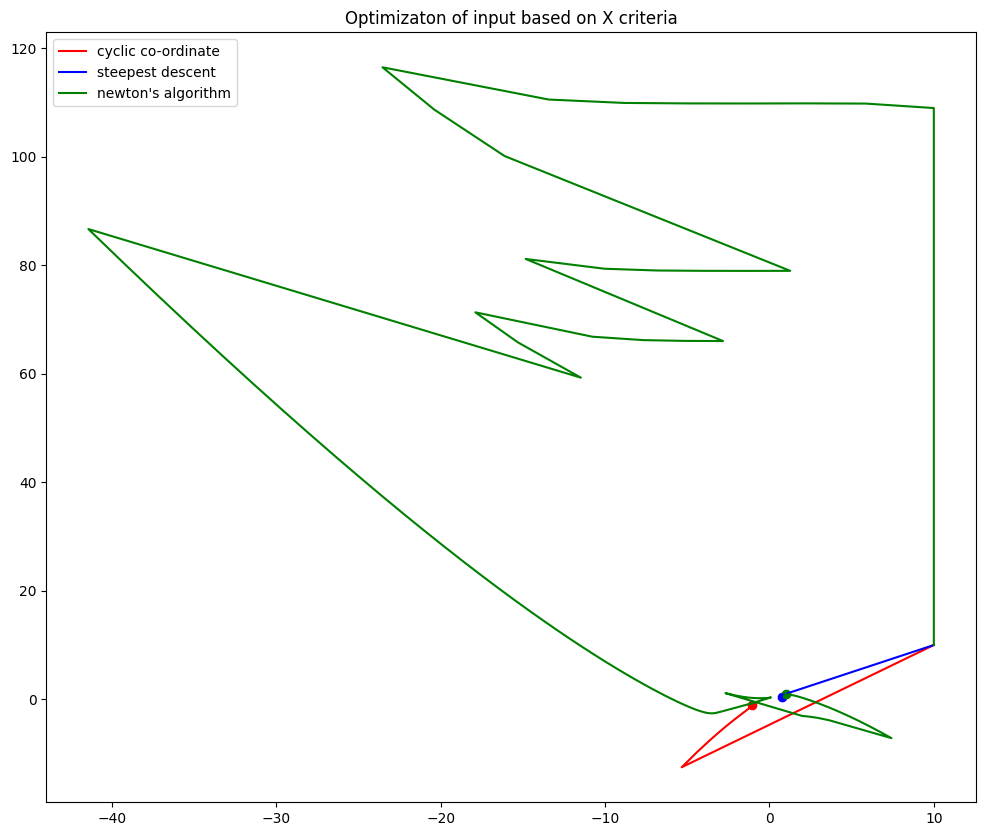

In [140]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_x_criteria_coord[:,0], cyclic_cordinate_x_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_x_criteria_coord[-1:,0], cyclic_cordinate_x_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_x_criteria_coord[:,0], steepest_descent_x_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_x_criteria_coord[-1:,0], steepest_descent_x_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_x_criteria_coord[:,0], newtons_x_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_x_criteria_coord[-1:,0], newtons_x_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on X criteria")
plt.legend()
plt.show()

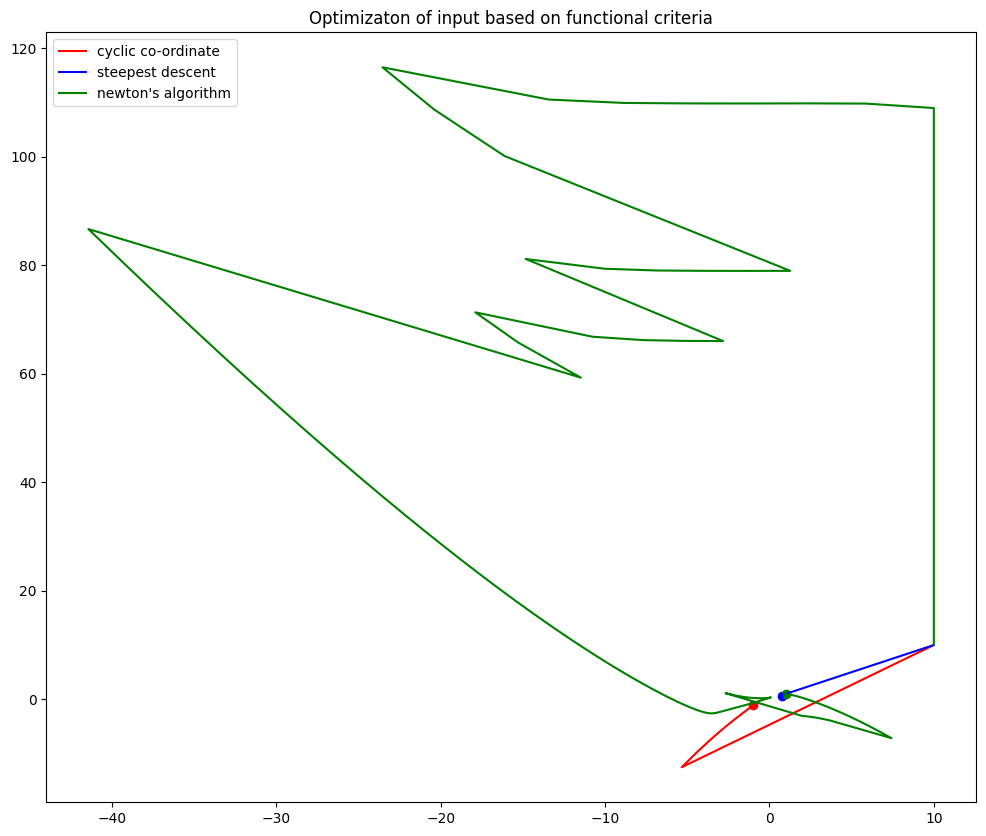

In [141]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_fx_criteria_coord[:,0], cyclic_cordinate_fx_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_fx_criteria_coord[-1:,0], cyclic_cordinate_fx_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_fx_criteria_coord[:,0], steepest_descent_fx_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_fx_criteria_coord[-1:,0], steepest_descent_fx_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_fx_criteria_coord[:,0], newtons_fx_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_fx_criteria_coord[-1:,0], newtons_fx_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on functional criteria")
plt.legend()
plt.show()

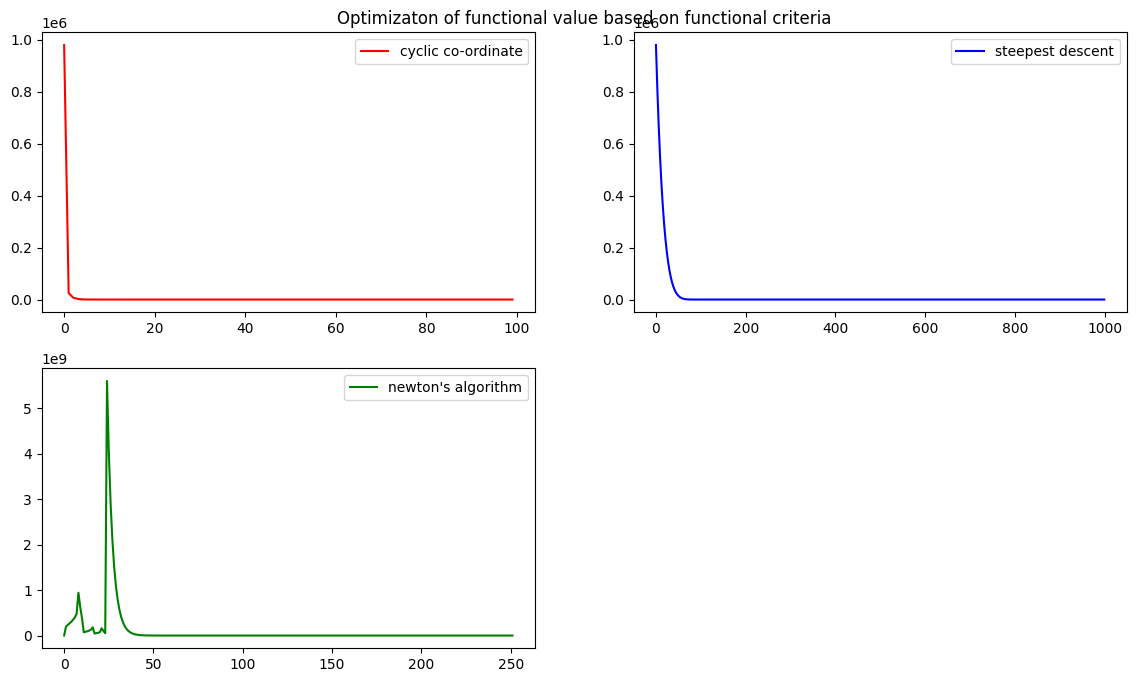

In [142]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on functional criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_fx_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_fx_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_fx_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

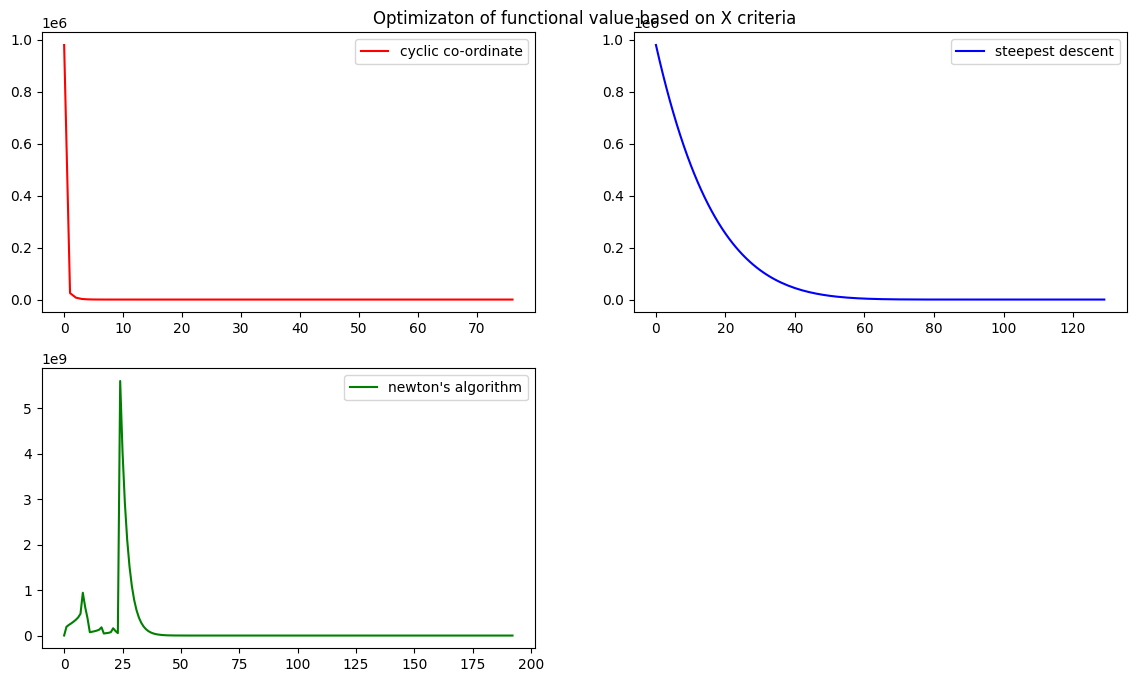

In [143]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on X criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_x_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_x_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_x_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

### Initial point -2,-2

In [47]:
cyclic_cordinate_fx_criteria_coord, cyclic_cordinate_fx_criteria_func = cyclic_coordinate([2,0], termination_criteria='fx')
cyclic_cordinate_x_criteria_coord,cyclic_cordinate_x_criteria_func = cyclic_coordinate([2,0], termination_criteria='x')

steepest_descent_fx_criteria_coord, steepest_descent_fx_criteria_func = steepest_descent([2,0], termination_criteria='fx')
steepest_descent_x_criteria_coord, steepest_descent_x_criteria_func = steepest_descent([2,0], termination_criteria='x')

newtons_fx_criteria_coord, newtons_fx_criteria_func = newtons([2,0], termination_criteria='fx')
newtons_x_criteria_coord, newtons_x_criteria_func = newtons([2,0], termination_criteria='x')

## print result
print(f"The optimal value of x using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_coord[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_coord[-1]},\nand the optimal value of function using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_func[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_coord[-1]} and Fx criteria is {steepest_descent_fx_criteria_coord[-1]}, \nand the optimal value of function using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_func[-1]} and Fx criteria is {steepest_descent_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the newton's algorithm with X criteria is {newtons_x_criteria_coord[-1]} and Fx criteria is {newtons_fx_criteria_coord[-1]}, \nand the optimal value of function using the newton's algorithm with X criteria is {newtons_x_criteria_func[-1]} and Fx criteria is {newtons_fx_criteria_func[-1]}\n")

## to array
cyclic_cordinate_fx_criteria_coord = np.array(cyclic_cordinate_fx_criteria_coord)
cyclic_cordinate_x_criteria_coord = np.array(cyclic_cordinate_x_criteria_coord)

steepest_descent_fx_criteria_coord = np.array(steepest_descent_fx_criteria_coord)
steepest_descent_x_criteria_coord = np.array(steepest_descent_x_criteria_coord)

newtons_fx_criteria_coord = np.array(newtons_fx_criteria_coord)
newtons_x_criteria_coord = np.array(newtons_x_criteria_coord)


C:\Users\Swastik\AppData\Local\Temp\ipykernel_17472\2373384730.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  if (diff/f1 <= 0.001):
C:\Users\Swastik\AppData\Local\Temp\ipykernel_17472\2373384730.py:16: RuntimeWarning: invalid value encountered in scalar divide
  if (diff/f1 <= 0.001):


The optimal value of x using the cyclic coordinate algorithm with X criteria is [0. 0.] and Fx criteria is [0. 0.],
and the optimal value of function using the cyclic coordinate algorithm with X criteria is 0.0 and Fx criteria is 0.0

The optimal value of x using the steepest descent algorithm with X criteria is [-0.10190725  0.24939708] and Fx criteria is [-0.04835289 -0.00029494], 
and the optimal value of function using the steepest descent algorithm with X criteria is 0.1026895459257976 and Fx criteria is 1.0711974483223247e-05

The optimal value of x using the newton's algorithm with X criteria is [0.44091984 0.18099018] and Fx criteria is [0.44333649 0.17815843], 
and the optimal value of function using the newton's algorithm with X criteria is 0.01827917915414935 and Fx criteria is 0.018171059316413565



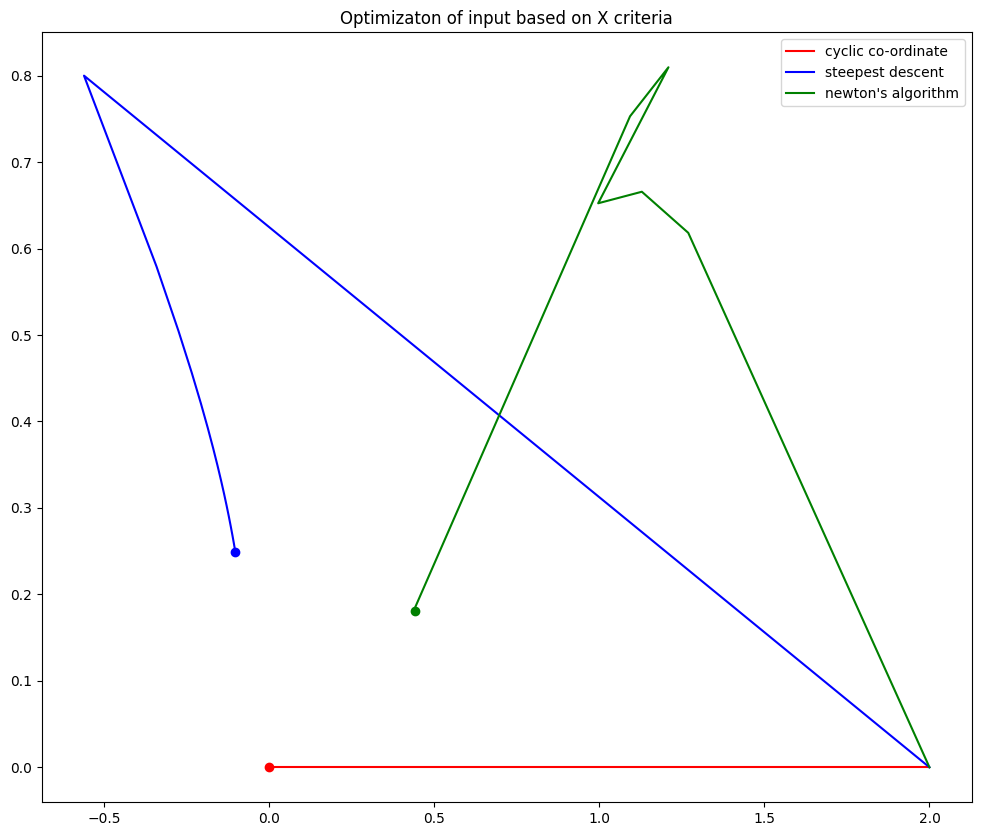

In [48]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_x_criteria_coord[:,0], cyclic_cordinate_x_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_x_criteria_coord[-1:,0], cyclic_cordinate_x_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_x_criteria_coord[:,0], steepest_descent_x_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_x_criteria_coord[-1:,0], steepest_descent_x_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_x_criteria_coord[:,0], newtons_x_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_x_criteria_coord[-1:,0], newtons_x_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on X criteria")
plt.legend()
plt.show()

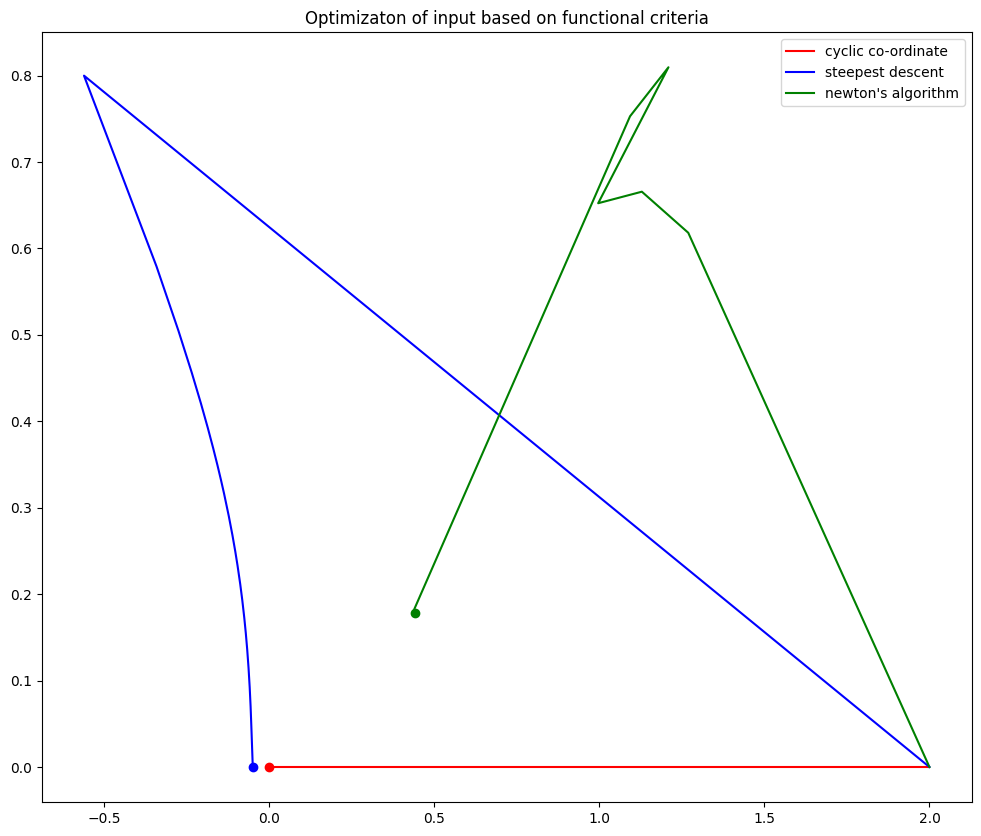

In [49]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_fx_criteria_coord[:,0], cyclic_cordinate_fx_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_fx_criteria_coord[-1:,0], cyclic_cordinate_fx_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_fx_criteria_coord[:,0], steepest_descent_fx_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_fx_criteria_coord[-1:,0], steepest_descent_fx_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_fx_criteria_coord[:,0], newtons_fx_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_fx_criteria_coord[-1:,0], newtons_fx_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on functional criteria")
plt.legend()
plt.show()

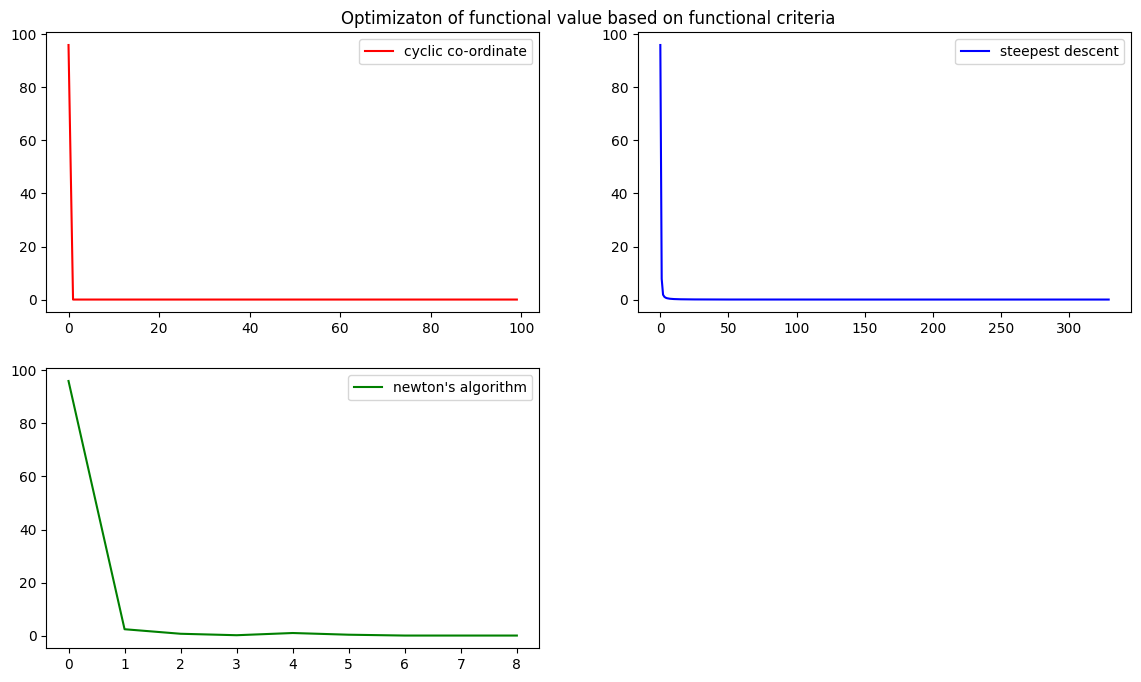

In [50]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on functional criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_fx_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_fx_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_fx_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

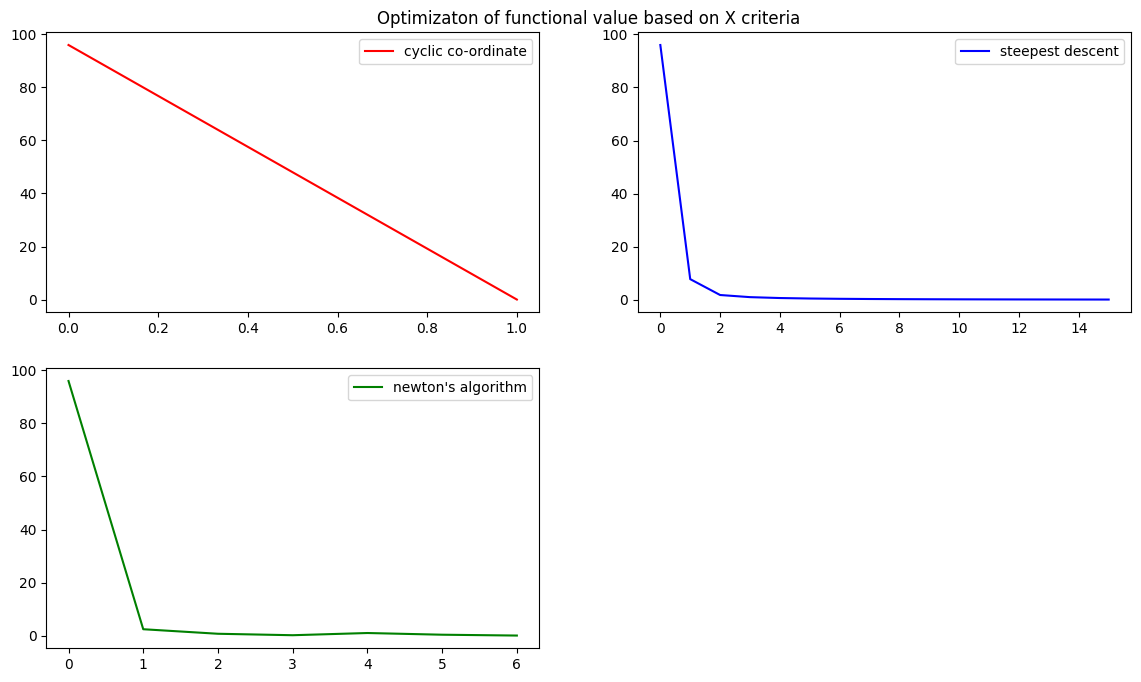

In [51]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on X criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_x_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_x_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_x_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

### Epsilon value 0.001 for the x case and 0.0001 for fx case, keeping initial point as (2,0)

In [52]:
def x_criteria(x1:list, x2:list):
    diff = [x1[i]-x2[i] for i in range(len(x1))]
        
    if (norm(diff) <= 0.001):
        return True
    else:
        return False
    
def fx_criteria(f1,f2):
    high = max(f1,f2)
    low = min(f1,f2)
    diff = high-low
    if (diff/f1 <= 0.0001):
        return True
    else:
        return False

In [53]:
cyclic_cordinate_fx_criteria_coord, cyclic_cordinate_fx_criteria_func = cyclic_coordinate([2,0], termination_criteria='fx')
cyclic_cordinate_x_criteria_coord,cyclic_cordinate_x_criteria_func = cyclic_coordinate([2,0], termination_criteria='x')

steepest_descent_fx_criteria_coord, steepest_descent_fx_criteria_func = steepest_descent([2,0], termination_criteria='fx')
steepest_descent_x_criteria_coord, steepest_descent_x_criteria_func = steepest_descent([2,0], termination_criteria='x')

newtons_fx_criteria_coord, newtons_fx_criteria_func = newtons([2,0], termination_criteria='fx')
newtons_x_criteria_coord, newtons_x_criteria_func = newtons([2,0], termination_criteria='x')

## print result
print(f"The optimal value of x using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_coord[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_coord[-1]},\nand the optimal value of function using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_func[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_coord[-1]} and Fx criteria is {steepest_descent_fx_criteria_coord[-1]}, \nand the optimal value of function using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_func[-1]} and Fx criteria is {steepest_descent_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the newton's algorithm with X criteria is {newtons_x_criteria_coord[-1]} and Fx criteria is {newtons_fx_criteria_coord[-1]}, \nand the optimal value of function using the newton's algorithm with X criteria is {newtons_x_criteria_func[-1]} and Fx criteria is {newtons_fx_criteria_func[-1]}\n")

## to array
cyclic_cordinate_fx_criteria_coord = np.array(cyclic_cordinate_fx_criteria_coord)
cyclic_cordinate_x_criteria_coord = np.array(cyclic_cordinate_x_criteria_coord)

steepest_descent_fx_criteria_coord = np.array(steepest_descent_fx_criteria_coord)
steepest_descent_x_criteria_coord = np.array(steepest_descent_x_criteria_coord)

newtons_fx_criteria_coord = np.array(newtons_fx_criteria_coord)
newtons_x_criteria_coord = np.array(newtons_x_criteria_coord)


C:\Users\Swastik\AppData\Local\Temp\ipykernel_17472\2236274573.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  if (diff/f1 <= 0.0001):
C:\Users\Swastik\AppData\Local\Temp\ipykernel_17472\2236274573.py:13: RuntimeWarning: invalid value encountered in scalar divide
  if (diff/f1 <= 0.0001):


The optimal value of x using the cyclic coordinate algorithm with X criteria is [0. 0.] and Fx criteria is [0. 0.],
and the optimal value of function using the cyclic coordinate algorithm with X criteria is 0.0 and Fx criteria is 0.0

The optimal value of x using the steepest descent algorithm with X criteria is [-0.05300767  0.04406873] and Fx criteria is [-0.04339226 -0.00040828], 
and the optimal value of function using the steepest descent algorithm with X criteria is 0.0022283789329247605 and Fx criteria is 6.938063584402551e-06

The optimal value of x using the newton's algorithm with X criteria is [0.51652253 0.23950719] and Fx criteria is [0.56257159 0.29628895], 
and the optimal value of function using the newton's algorithm with X criteria is 0.022154657972180726 and Fx criteria is 0.024038058121831282



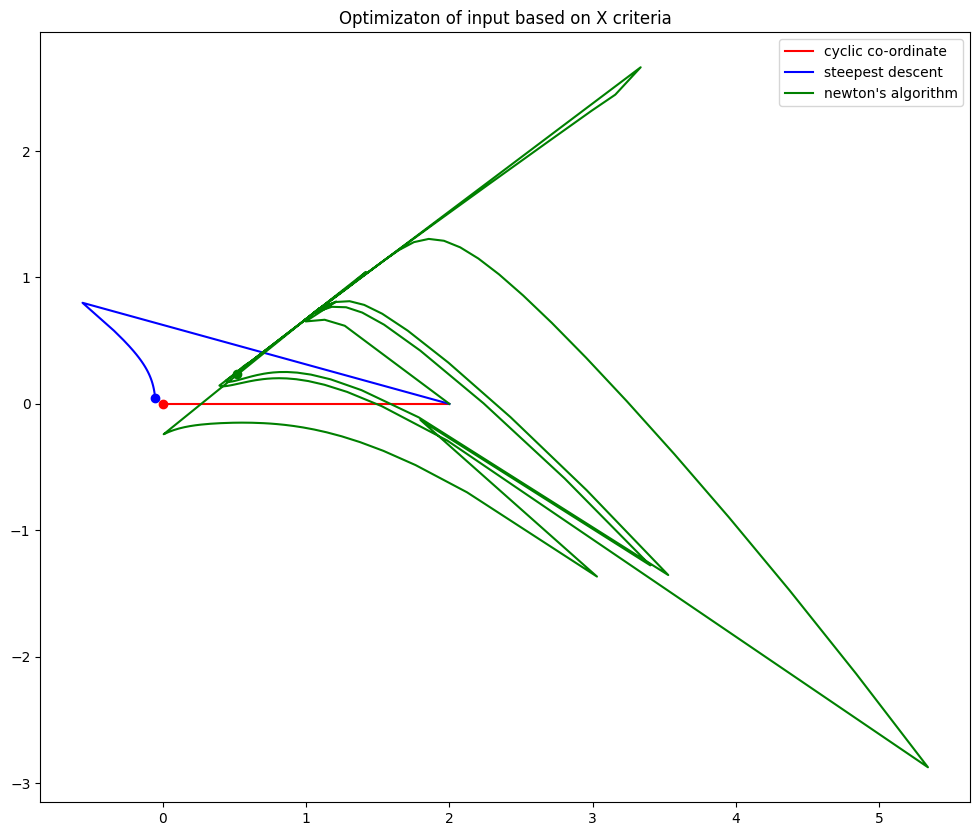

In [54]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_x_criteria_coord[:,0], cyclic_cordinate_x_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_x_criteria_coord[-1:,0], cyclic_cordinate_x_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_x_criteria_coord[:,0], steepest_descent_x_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_x_criteria_coord[-1:,0], steepest_descent_x_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_x_criteria_coord[:,0], newtons_x_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_x_criteria_coord[-1:,0], newtons_x_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on X criteria")
plt.legend()
plt.show()

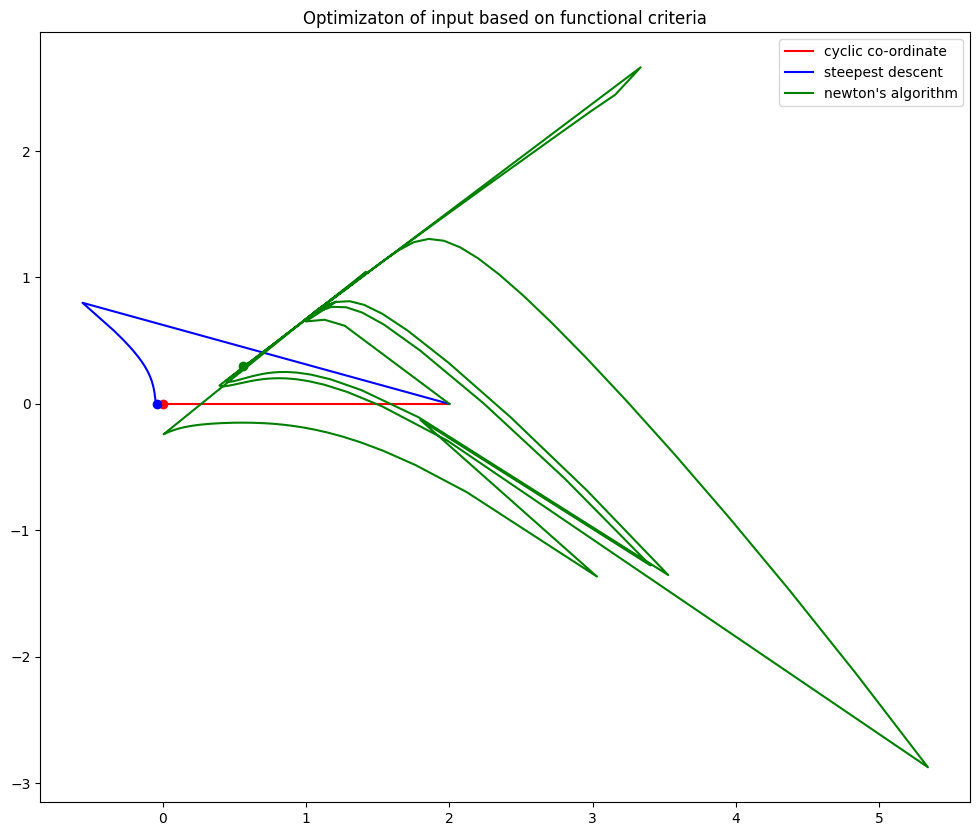

In [55]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_fx_criteria_coord[:,0], cyclic_cordinate_fx_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_fx_criteria_coord[-1:,0], cyclic_cordinate_fx_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_fx_criteria_coord[:,0], steepest_descent_fx_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_fx_criteria_coord[-1:,0], steepest_descent_fx_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_fx_criteria_coord[:,0], newtons_fx_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_fx_criteria_coord[-1:,0], newtons_fx_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on functional criteria")
plt.legend()
plt.show()

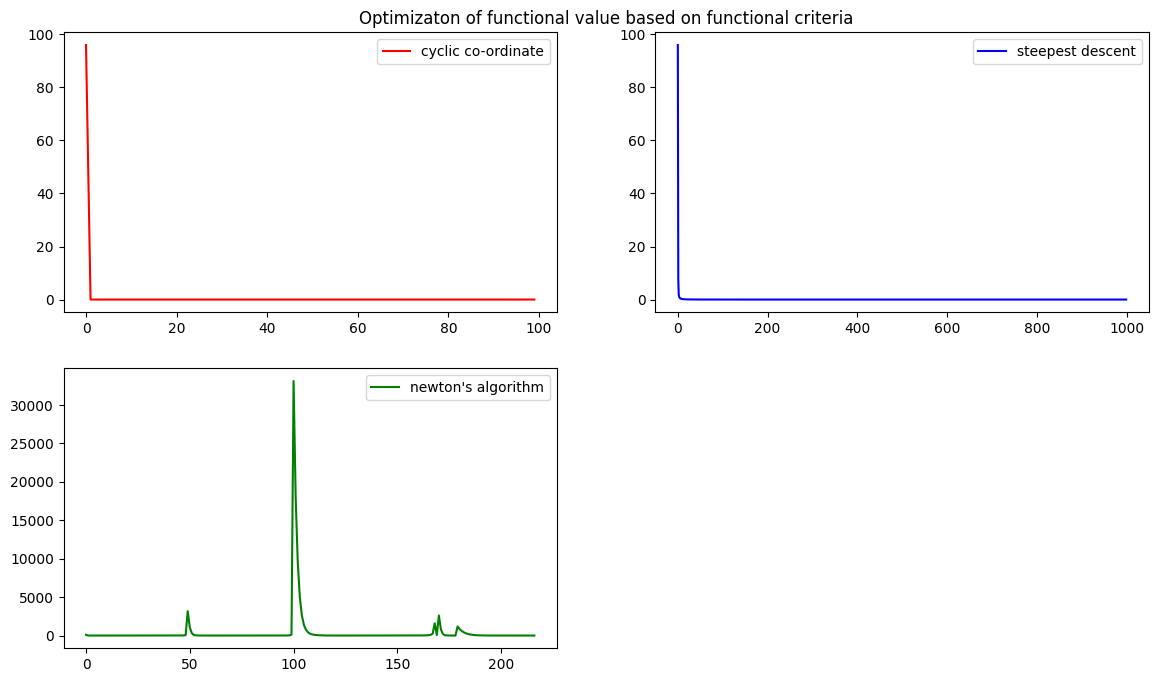

In [56]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on functional criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_fx_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_fx_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_fx_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

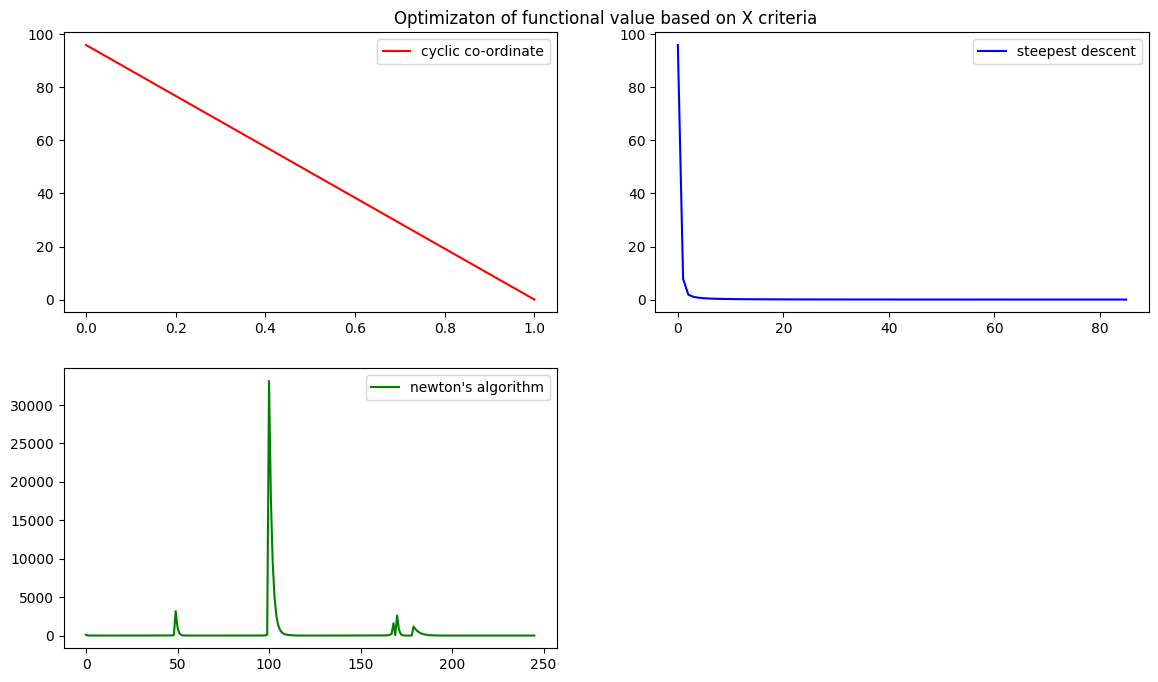

In [57]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on X criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_x_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_x_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_x_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()